In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [2]:
import seaborn as sns

In [ ]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_dA_US = df_DA_US.dropna(subset = ['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_dist = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_dist
df_top_pay = df_dist.sort_values(by = 'median', ascending=False).head(10)
df_top_skills = df_dist.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False).head(10)

#### Changing the previous code of this plot by seaborn 

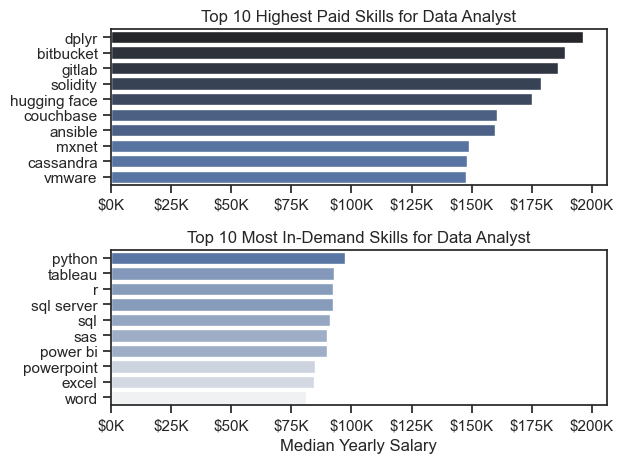

In [13]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue = 'median',legend=False, palette='dark:b_r')
#df_top_pay.plot(kind='barh',y='median', ax=ax[0], legend=False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

sns.barplot(data = df_top_skills, x='median', y=df_top_skills.index, ax= ax[1],legend=False, hue='median', palette='light:b')
# df_top_skills[::-1].plot(kind='barh',y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()


#### Histogram Transformation

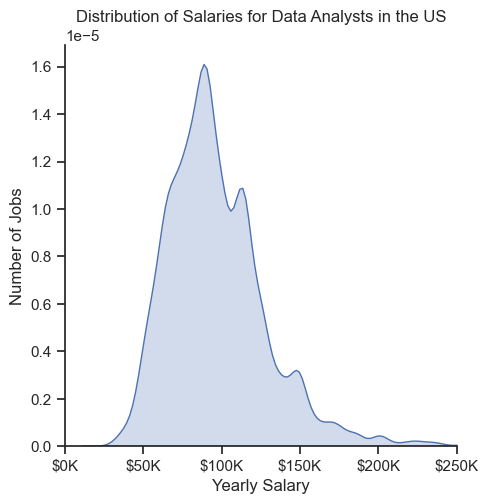

In [ ]:
#df_DA_US['salary_year_avg'].plot(kind = 'hist',bins=40, edgecolor='black')

sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill= True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K')) 
plt.xlim(0,250000)
plt.title('Distribution of Salaries for Data Analysts in the US')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

#### Box Plots Transformation

In [17]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles))& (df['job_country']== 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==title]['salary_year_avg'] for title in job_titles]


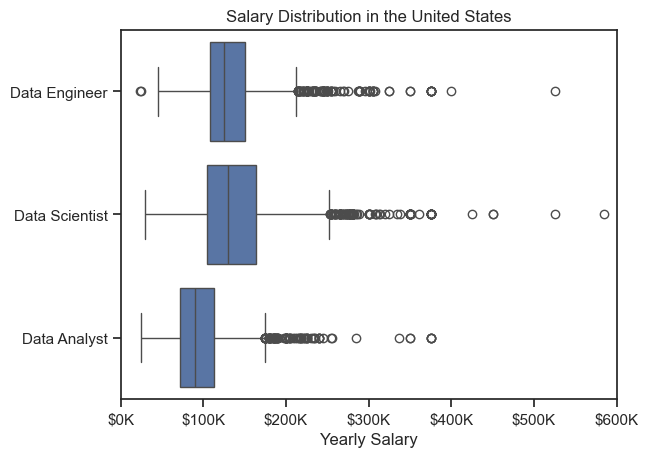

In [20]:
#plt.boxplot(job_list, tick_labels=job_titles, vert=False)

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary')
plt.ylabel('')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax.set_xlim(0,600000)
plt.show()